# (Allen) MERFISH data SSAM analysis

In [1]:
import ssam
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.rcParams["font.family"] = "Arial"

In [4]:
cell_class_colors = {
    "Lamp5": "#DA808C",
    "Sncg": "#8510C0",
    "Serpinf1": "#8510C0",
    "Vip": "#70559A",
    "Sst": "#F15A29",
    "Pvalb": "#D93137",
    "L2/3 IT": "#94D9A1",
    "L4": "#00979D",
    "L5 IT": "#008A61",
    "L6 IT": "#A19922",
    "L5 PT": "#0D5B78",
    "L5 NP": "#3E9E64",
    "L6 CT": "#69A8E6",
    "L6 PT": "#69A8E6", #???
    "L6b": "#266180",
    "Meis2": "#FF0000",
    "CR": "#00FF66",
    "Astro": "#665C47",
    "Oligo": "#53776C",
    "VLMC": "#697255",
    "Peri": "#665547",
    "SMC": "#807059",
    "Endo": "#8D6C62",
    "Macrophage": "#537358",    
}

In [4]:
bad_genes = ['Cd52', 'Mup5', 'Rab3b', 'Rprml', 'Tac2']

In [5]:
baysor_spots = pd.read_csv("data/baysor/merfish/segmentation.csv")
spots = pd.read_csv("data/raw/Allen_MERFISH_spots_with_anatomy.csv")
spots = spots.drop(spots.columns[:2], axis=1).drop_duplicates().reset_index(drop=True)
spots['is_noise'] = baysor_spots.is_noise
spots['cell'] = baysor_spots.cell
spots = spots[spots.layer != 'outside_VISp']
spots = spots[~spots.gene.str.contains("Blank-")]
for bad_gene in bad_genes:
    spots = spots[spots.gene != bad_gene]

In [6]:
coordinates_visp = [[2524.8618583932202, 6576.111948820892],
   [1688.0005423837813, 5869.404423590317],
   [2299.438470759311, 4923.428032738741],
   [3273.6610578379136, 5452.419069146657],
   [2851.6245044166735, 6284.883773573806],
   [2851.6245044166735, 6284.883773573806],
   [2524.8618583932202, 6576.111948820892]]

In [7]:
import json
from shapely.geometry import Point, Polygon
p = Polygon(coordinates_visp)
spots['VISp'] = [True if p.intersects(Point(a)) else False for a in spots[["x_um","y_um"]].values]

In [8]:
spots = spots[spots['VISp']]

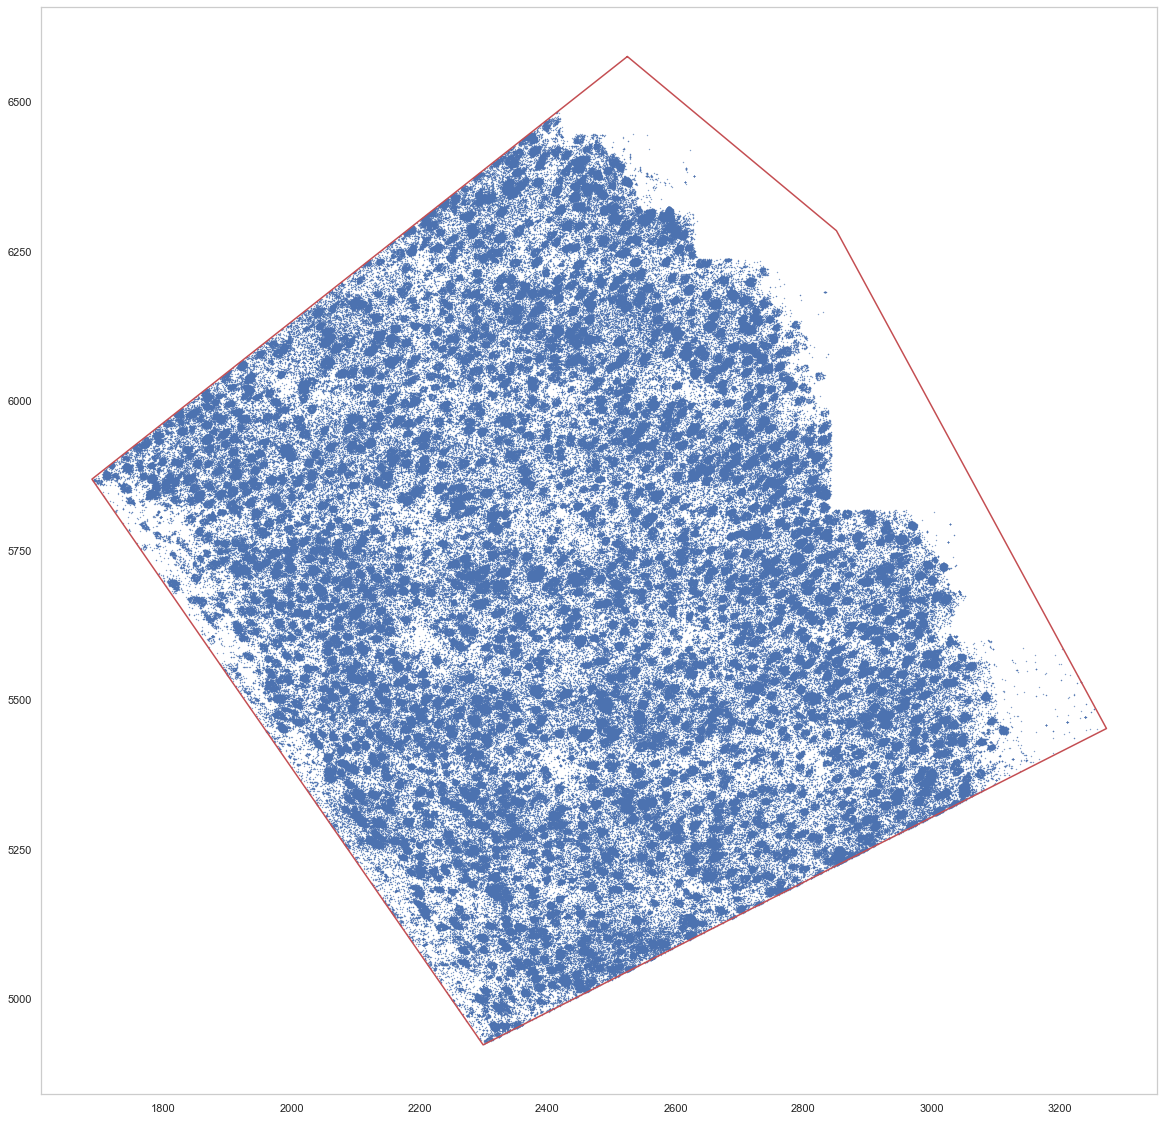

In [9]:
plt.figure(figsize=[20, 20])
plt.plot(*p.exterior.xy, c="r")
plt.scatter(spots.x_um, spots.y_um, s=0.1)

In [10]:
beta = 1.03388671635385
rotm = np.array([[np.cos(beta), np.sin(beta)], [-np.sin(beta), np.cos(beta)]])

In [11]:
pos_um = np.array([spots.x_um, spots.y_um])
rot_um = np.dot(pos_um.T, rotm)
rot_um[:, 0] -= np.min(rot_um[:, 0])
rot_um[:, 1] -= np.min(rot_um[:, 1])

(0.0, 1350.0)

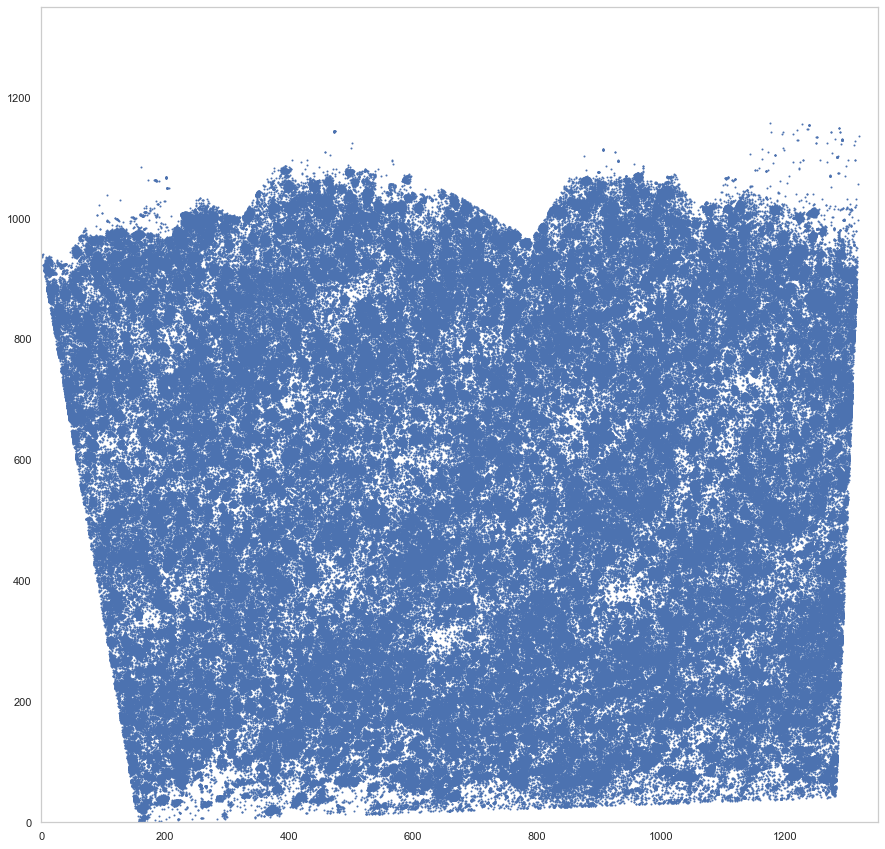

In [12]:
plt.figure(figsize=[15, 15])
plt.scatter(*rot_um.T, s=1)
plt.xlim([0, 1350])
plt.ylim([0, 1350])

In [5]:
ds = ssam.SSAMDataset("ssam_data/allen_merfish")
analysis = ssam.SSAMAnalysis(ds, ncores=10, verbose=True)

In [14]:
locations = spots[["gene", "x_um", "y_um", "cell"]].rename(columns={'x_um': 'x', 'y_um': 'y'}).set_index('gene')
locations.x = rot_um[:, 0]
locations.y = rot_um[:, 1]

In [15]:
locations.to_csv("Allen_MERFISH_filtered.csv")

In [ ]:
analysis.run_kde(locations=locations, width=locations.x.max(), height=locations.y.max(), re_run=True)

Running KDE for gene 1700022I11Rik...
Saving KDE for gene 1700022I11Rik...
Running KDE for gene 1810046K07Rik...
Saving KDE for gene 1810046K07Rik...
Running KDE for gene 5031425F14Rik...
Saving KDE for gene 5031425F14Rik...
Running KDE for gene 5730522E02Rik...
Saving KDE for gene 5730522E02Rik...
Running KDE for gene Acta2...
Saving KDE for gene Acta2...
Running KDE for gene Adam2...
Saving KDE for gene Adam2...
Running KDE for gene Adamts2...
Saving KDE for gene Adamts2...
Running KDE for gene Adamts4...
Saving KDE for gene Adamts4...
Running KDE for gene Adra1b...
Saving KDE for gene Adra1b...
Running KDE for gene Alk...
Saving KDE for gene Alk...
Running KDE for gene Ankfn1...
Saving KDE for gene Ankfn1...
Running KDE for gene Ano4...
Saving KDE for gene Ano4...
Running KDE for gene Aqp4...
Saving KDE for gene Aqp4...
Running KDE for gene Asic4...
Saving KDE for gene Asic4...
Running KDE for gene B4galnt2...
Saving KDE for gene B4galnt2...
Running KDE for gene B4galnt3...
Saving K

Running KDE for gene Nos1...
Saving KDE for gene Nos1...
Running KDE for gene Npas1...
Saving KDE for gene Npas1...
Running KDE for gene Npnt...
Saving KDE for gene Npnt...
Running KDE for gene Npsr1...
Saving KDE for gene Npsr1...
Running KDE for gene Npy2r...
Saving KDE for gene Npy2r...
Running KDE for gene Nr2f2...
Saving KDE for gene Nr2f2...
Running KDE for gene Nr4a1...
Saving KDE for gene Nr4a1...
Running KDE for gene Nr4a2...
Saving KDE for gene Nr4a2...
Running KDE for gene Ntng2...
Saving KDE for gene Ntng2...
Running KDE for gene Nxph1...
Saving KDE for gene Nxph1...
Running KDE for gene Nxph2...
Saving KDE for gene Nxph2...
Running KDE for gene Nxph4...
Saving KDE for gene Nxph4...
Running KDE for gene Olah...
Saving KDE for gene Olah...
Running KDE for gene Olfm3...
Saving KDE for gene Olfm3...
Running KDE for gene Opalin...
Saving KDE for gene Opalin...
Running KDE for gene Oprk1...
Saving KDE for gene Oprk1...
Running KDE for gene Osr1...
Saving KDE for gene Osr1...
Run

In [6]:
analysis.load_kde()

<function matplotlib.pyplot.xlim(*args, **kwargs)>

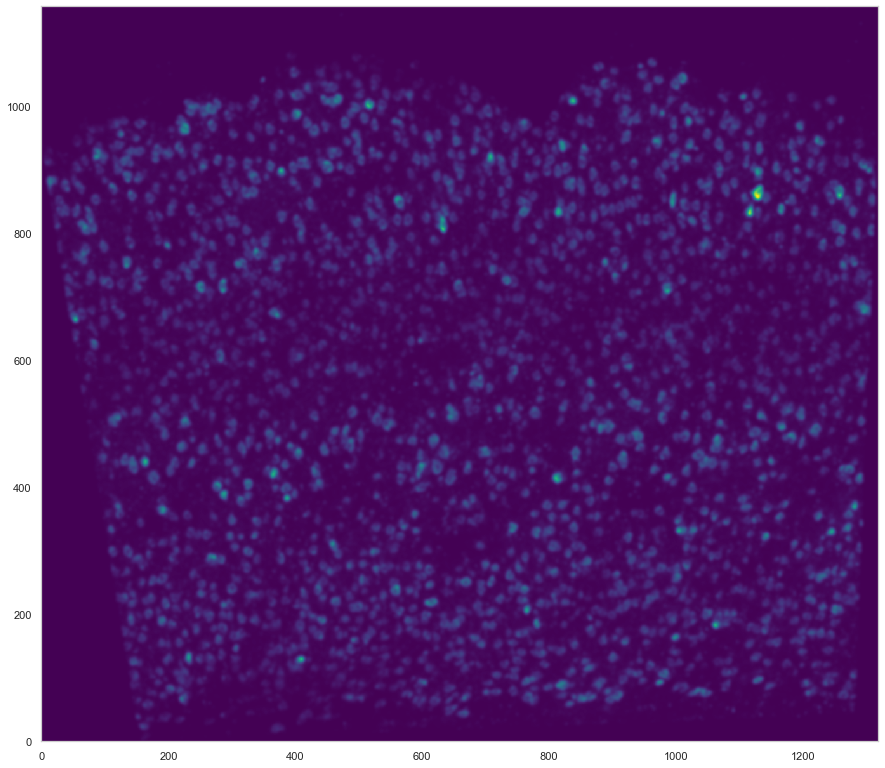

In [17]:
plt.figure(figsize=[15, 15])
ds.plot_l1norm(rotate=3)
plt.xlim

In [18]:
analysis.find_localmax()

Found 4535 local max vectors.


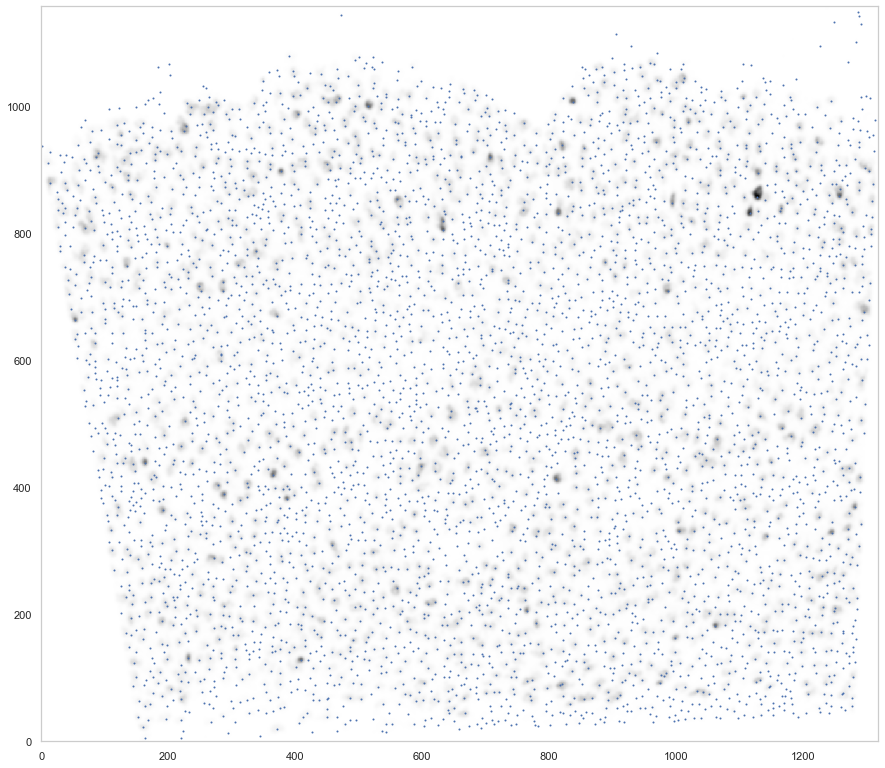

In [19]:
plt.figure(figsize=[15, 15])
ds.plot_l1norm(rotate=3, cmap="Greys")
ds.plot_localmax(rotate=3)

In [20]:
analysis.normalize_vectors()

Loaded a cached normalized vector field (to avoid this behavior, set re_run=True).


In [7]:
cell_by_gene = pd.read_csv("data/jeremy_filtered/MERFISH_v1_filtered_cellxgene.csv")
cell_by_gene = cell_by_gene.set_index('gene_name').T[ds.genes]

In [8]:
from sklearn.preprocessing import normalize, scale
#cell_by_gene_normalized = ssam.run_sctransform(cell_by_gene.reset_index(drop=True), plot_model_pars=True)[0]
cell_by_gene_normalized = np.log(normalize(cell_by_gene, norm="l1", axis=1) * 10 + 1)
cell_by_gene_normalized_scaled = scale(cell_by_gene_normalized)

In [9]:
from collections import defaultdict
from itertools import chain

def sort_genes(centroids, tbl, genes, min_exp=0.5):
    sorted_genes = defaultdict(lambda: [])
    sorted_cnt = 0
    while sorted_cnt < len(genes):
        for cidx, mean_cl in enumerate(centroids):
            for gidx in np.argsort(mean_cl)[::-1]:
                if all([not genes[gidx] in l for l in sorted_genes.values()]):
                    if mean_cl[gidx] < min_exp:
                        sorted_genes["rem"].append(genes[gidx])
                    else:
                        sorted_genes[cidx].append(genes[gidx])
                    sorted_cnt += 1
                    break
    sorted_genes = list(chain(*[sorted_genes[i] for i in range(len(centroids))])) + sorted_genes["rem"]
    sorted_gidx = [list(genes).index(g) for g in sorted_genes]
    return tbl[:, sorted_gidx], sorted_genes

In [21]:
def plot_heatmap(sorted_cbg, sorted_genes, calls, uniq_calls, cols, figsize):
    from sklearn import preprocessing
    from mpl_toolkits.axes_grid1 import Divider, Size
    from matplotlib import patches

    rects = []
    sorted_cbg2 = np.zeros_like(sorted_cbg)
    curpos = 0
    for idx, (cell_type, col) in enumerate(zip(uniq_calls, cols)):
        cl_vecs = sorted_cbg[calls.subclass == cell_type]
        sorted_cbg2[curpos:curpos+len(cl_vecs)] = cl_vecs
        rects.append(patches.Rectangle((curpos, 0), curpos+len(cl_vecs), 1, linewidth=0, facecolor=col))
        curpos += len(cl_vecs)


    fig = plt.figure(figsize=figsize)
    #fig, axes = plt.subplots(2, 1, figsize=[20, 10], sharex=True)

    h = [Size.Fixed(1.5), Size.Scaled(1.0)]
    v = [Size.Fixed(0), Size.Scaled(1.0), Size.Fixed(0.05), Size.Fixed(0.3)]
    divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)

    ax_heatmap = fig.add_axes(divider.get_position(), axes_locator=divider.new_locator(nx=1, ny=1))
    ax_ctbar = fig.add_axes(divider.get_position(), axes_locator=divider.new_locator(nx=1, ny=3), sharex=ax_heatmap)

    for rect in rects:
        ax_ctbar.add_patch(rect)

    ax_ctbar.axes.xaxis.set_visible(False)
    ax_ctbar.axes.yaxis.set_visible(False)
    for sp in ax_ctbar.spines.values():
        sp.set_linewidth(0.5)
        sp.set_color('k')

    sns.heatmap(sorted_cbg2.T[::-1, :], vmin=-2.5, vmax=2.5, cmap='bwr', yticklabels=sorted_genes[::-1],
                cbar=None, ax=ax_heatmap)
    ax_heatmap.axes.xaxis.set_visible(False)
    for tick in ax_heatmap.get_yticklabels():
        tick.set_fontname("Arial")
    for sp in ax_heatmap.spines.values():
        sp.set_linewidth(0.5)
        sp.set_color('k')
        sp.set_visible(True)
    plt.yticks(rotation=0)

    #ax_hist = fig.add_axes([1.02, 0.74, 0.08, 0.1])
    #ax_hist.hist(np.ravel(sorted_cbg2), bins=100, histtype='step', lw=3, color='lime')
    #ax_hist.set_xlim([-2.5, 2.5])
    #ax_hist.axes.xaxis.set_ticks([-2.5, 0, 2.5])
    #ax_hist.axes.yaxis.set_visible(False)

    return fig

In [11]:
calls_nwcs = pd.read_csv("consensus_calls/renee/MERFISH_v1_filtered_combined_mapping_neg_weight_subclass.csv")

In [12]:
calls_nwcs

sample_name subclass      rmax           x            y
0               1    L6 PT  0.494448   712.40142   204.819190
1              12  L2/3 IT  0.682338  1217.39318   883.516611
2              18  L2/3 IT  0.638946   891.96394  1036.272708
3              20  L2/3 IT  0.367690   654.74648   973.435156
4              22  L2/3 IT  0.771932   645.90474   923.882162
...           ...      ...       ...         ...          ...
2145         5873    L6 PT  0.712868  1172.87814   136.951414
2146         5875  L2/3 IT  0.497523   241.48159   665.555457
2147         5877       L4  0.568966   968.05080   710.759896
2148         5878    Pvalb  0.649862   859.54284   480.890285
2149         5990  L2/3 IT  0.461098   482.98299  1056.178312

[2150 rows x 5 columns]

In [22]:
uniq_celltypes_nwcs = [cl for cl in cell_class_colors.keys() if cl in calls_nwcs.subclass.unique()]
centroids_nwcs = []
for cell_type in uniq_celltypes_nwcs:
    centroids_nwcs.append(np.mean(cell_by_gene_normalized[calls_nwcs.subclass == cell_type], axis=0))

In [23]:
centroids_scaled_nwcs = []
for cell_type in uniq_celltypes_nwcs:
    centroids_scaled_nwcs.append(np.mean(cell_by_gene_normalized_scaled[calls_nwcs.subclass == cell_type], axis=0))
    
sorted_cbg, sorted_genes = sort_genes(centroids_scaled_nwcs, cell_by_gene_normalized_scaled, ds.genes)

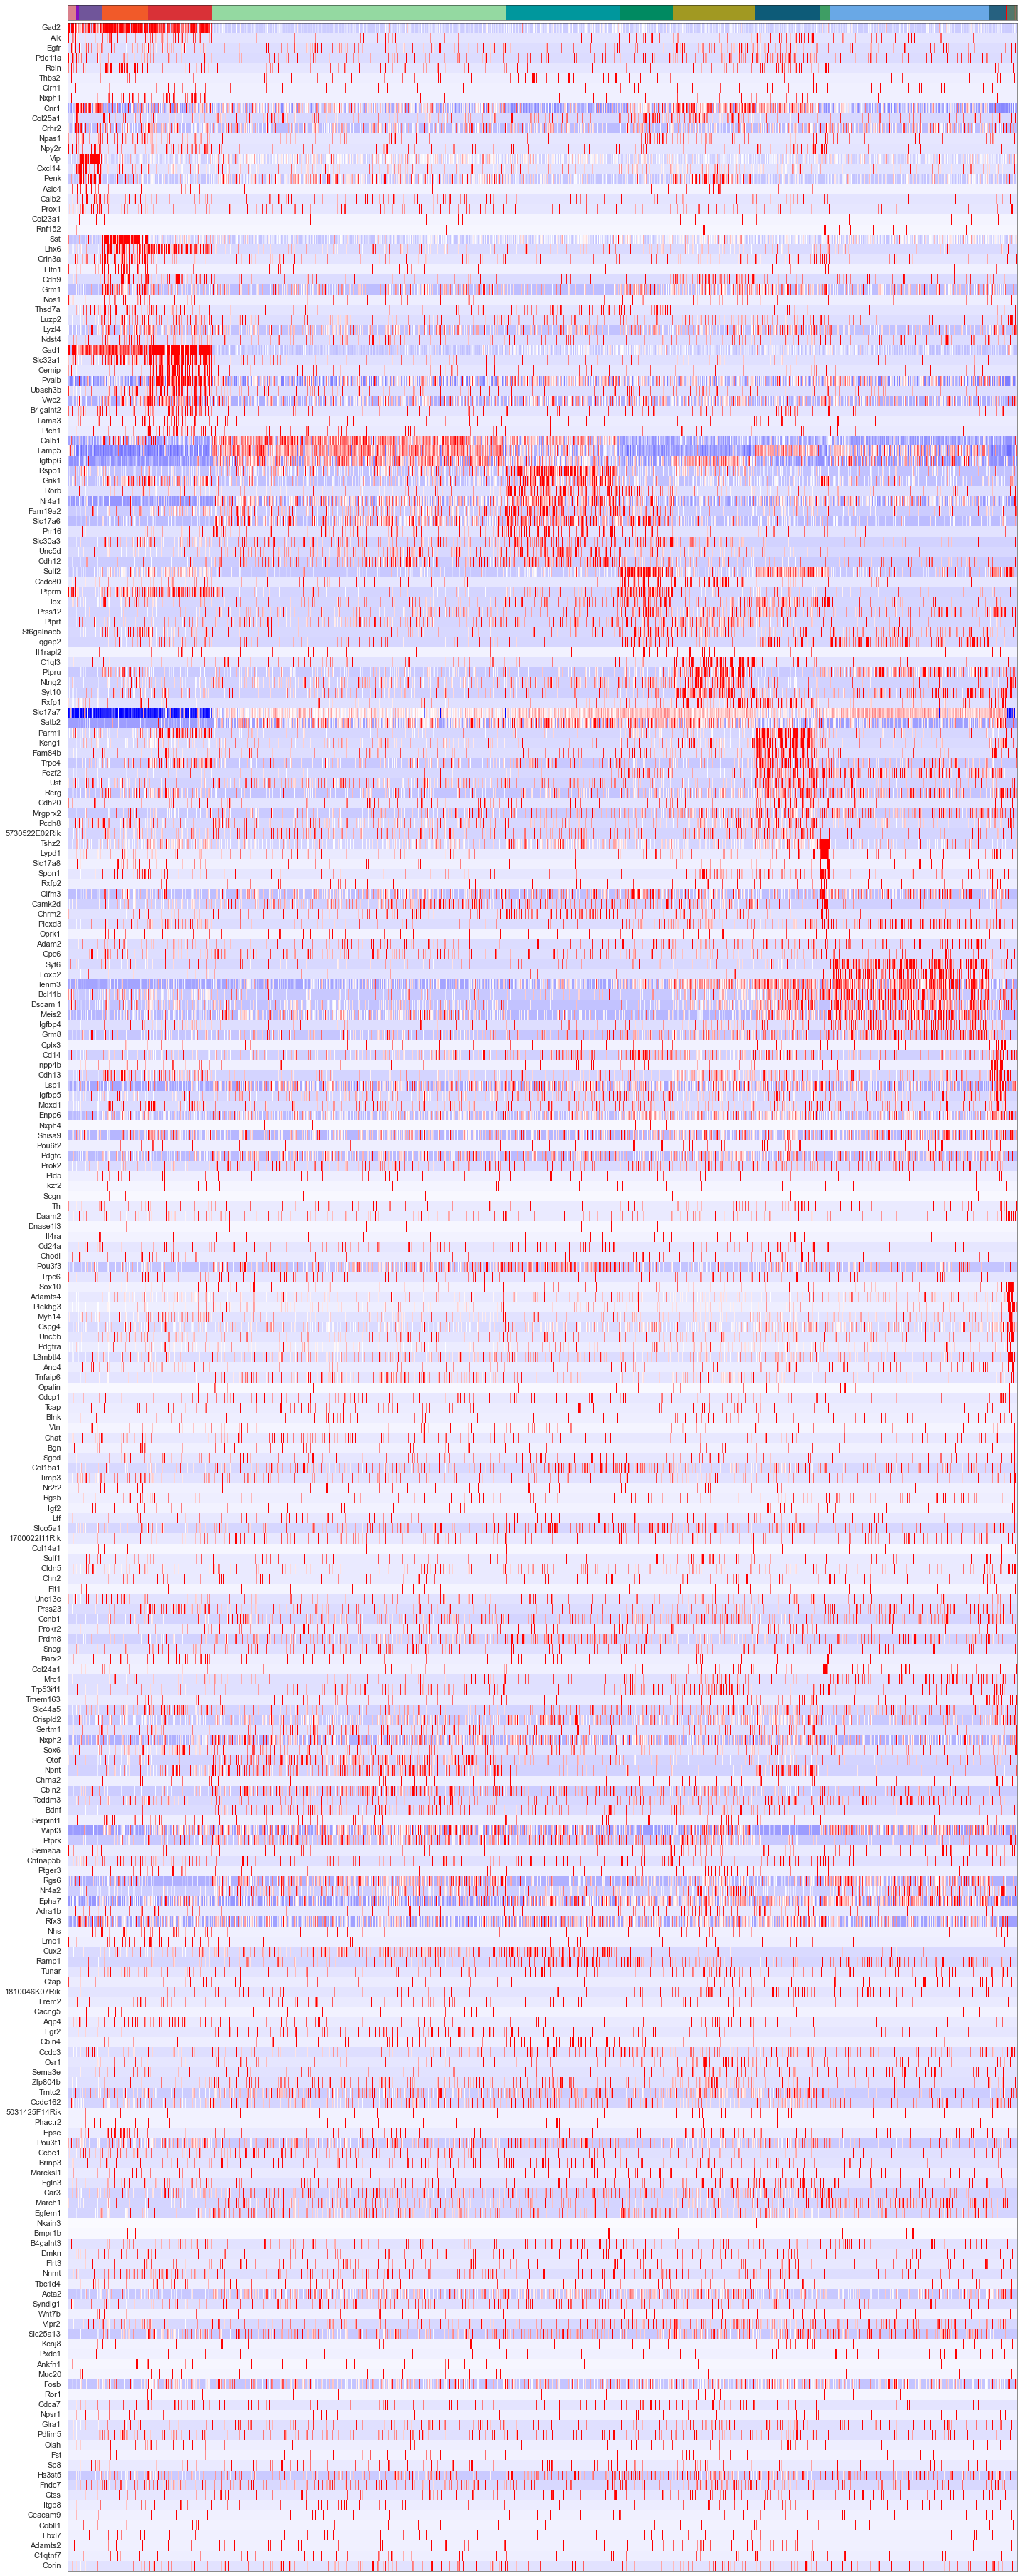

In [24]:
cols = [cell_class_colors[ct] for ct in uniq_celltypes_nwcs]
plot_heatmap(sorted_cbg[:, ::-1], sorted_genes[::-1], calls_nwcs, uniq_celltypes_nwcs, cols, [20, 50]).savefig("merfish_heatmap_nwcs.pdf")

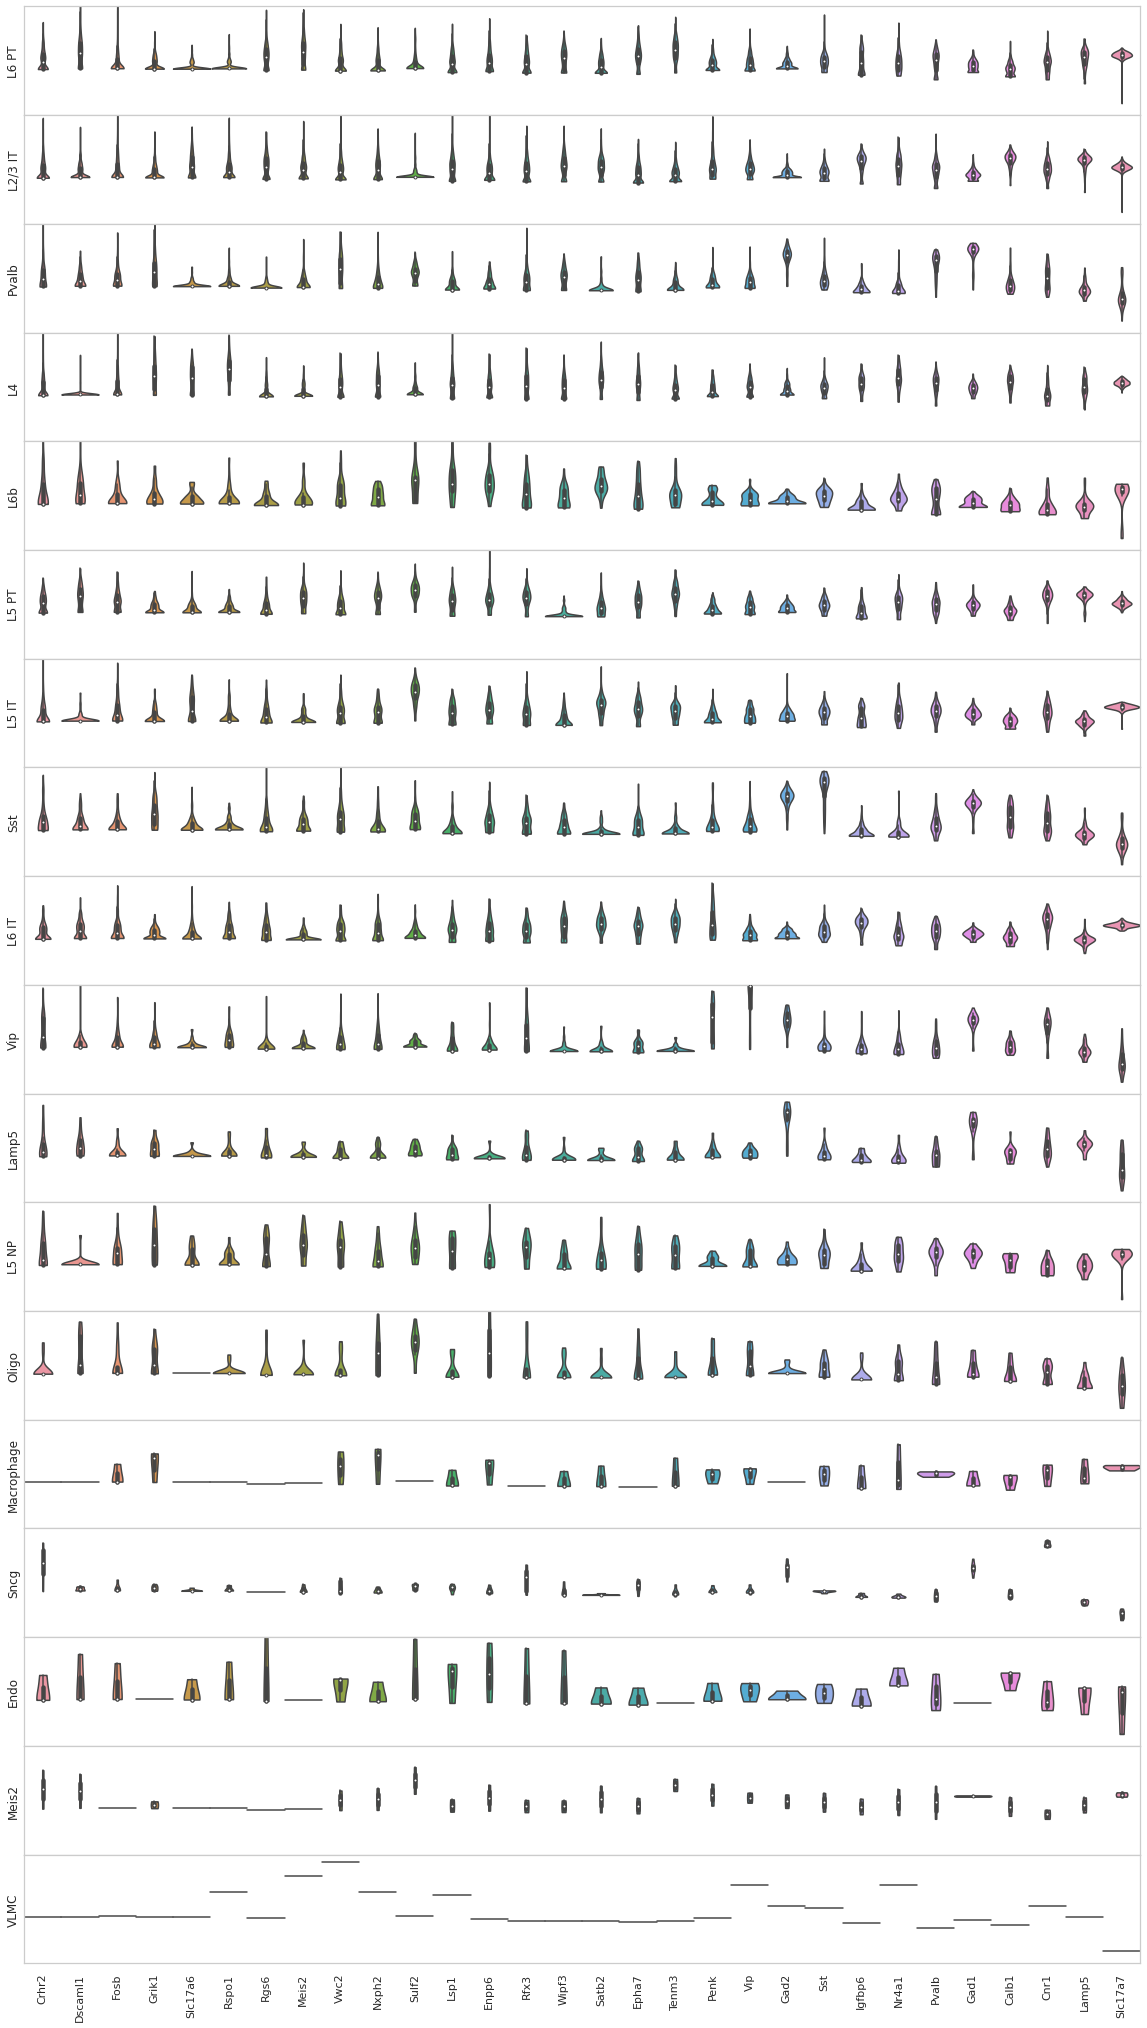

In [156]:
from sklearn import preprocessing
fig, axes = plt.subplots(len(uniq_celltypes_nwcs), 1, figsize=[20, len(uniq_celltypes_nwcs)*2])
plt.subplots_adjust(hspace=0)
for idx, cell_type in enumerate(uniq_celltypes_nwcs):
    cl_vecs = sorted_cbg[calls_nwcs.subclass == cell_type]
    if len(cl_vecs) == 1:
        cl_vecs = np.array([cl_vecs[0], cl_vecs[0]])
    sns.violinplot(ax=axes[idx], data=cl_vecs[:, -30:], width=1, cut=0)
    axes[idx].set_ylabel(cell_type)
    axes[idx].set_yticks([])
    axes[idx].set_ylim([-5, 5])
axes[idx].set_xticklabels(sorted_genes[-30:], rotation=90)
pass

In [11]:
map_colors_nwcs = [cell_class_colors[ct] for ct in uniq_celltypes_nwcs]

NameError: name 'cell_class_colors' is not defined

In [27]:
analysis.map_celltypes(centroids_nwcs)

Generating cell-type map for centroid #0...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #1...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #2...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #3...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #4...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #5...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #6...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #7...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map

In [28]:
analysis.filter_celltypemaps(min_norm=0.6, min_r=0.6)

Text(0.5, 1.0, 'MERFISH - NWCS (SSAM)')

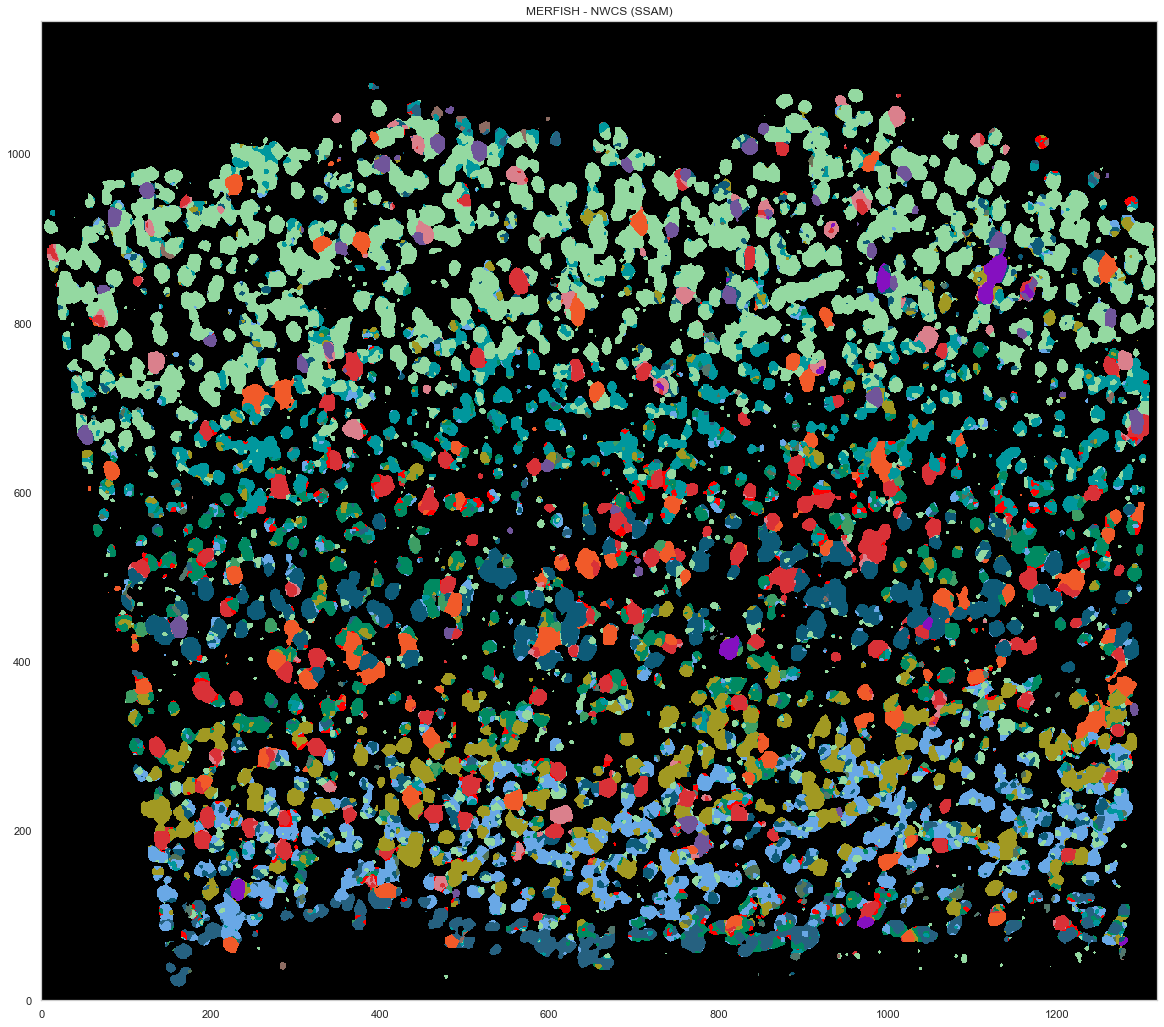

In [29]:
plt.figure(figsize=[20, 20])
ds.plot_celltypes_map(rotate=3, colors=map_colors_nwcs)
plt.title("MERFISH - NWCS (SSAM)")

In [30]:
ds.centroids = centroids_nwcs # TODO: this should not be necessary!

In [31]:
analysis.bin_celltypemaps(step=10, radius=100)

In [37]:
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.8, norm_thres=4000)

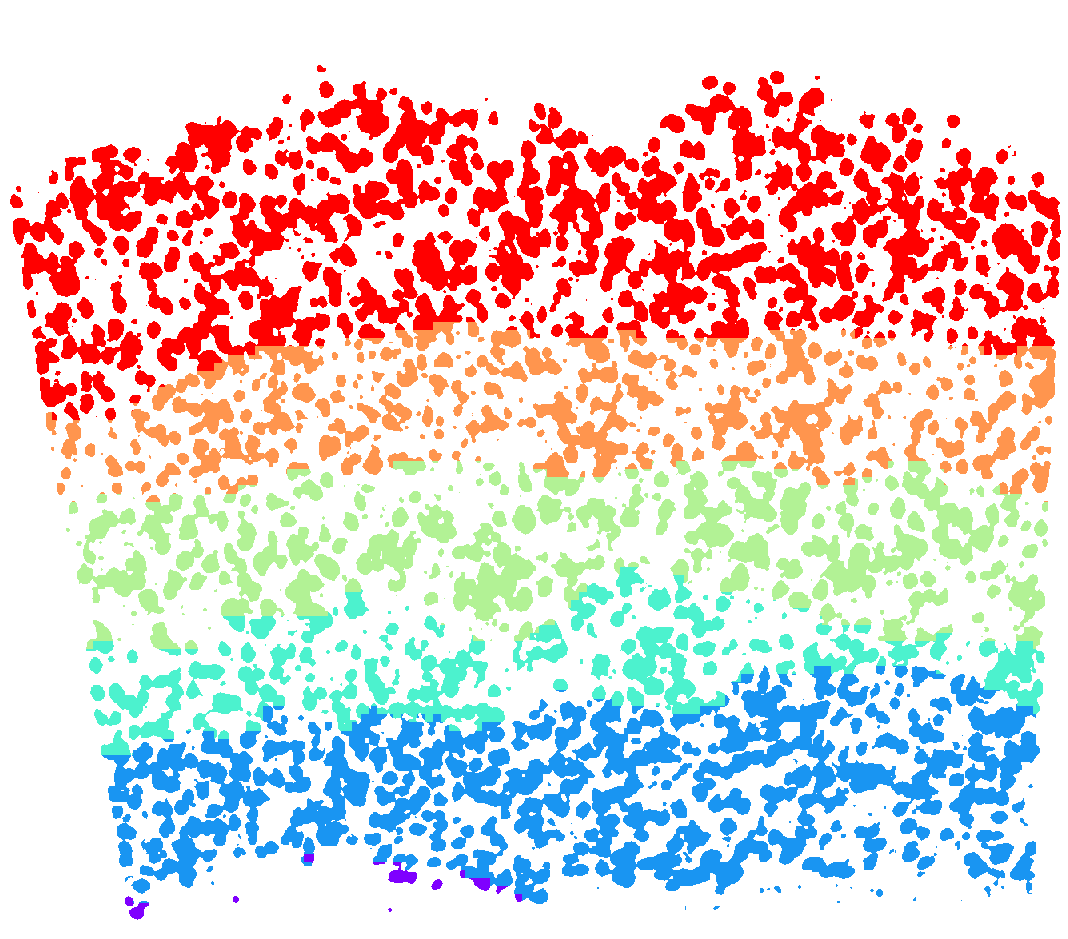

In [38]:
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=3, cmap='rainbow', z=0)
plt.axis('off')
plt.tight_layout()

In [39]:
layer_annotations = ds.inferred_domains[ds.local_maxs]

In [16]:
calls_gmcs = pd.read_csv("consensus_calls/charles/merfish_jeremy_pciseq_renee_eeshit_yilin_gabriele_consensus_df.csv")

In [17]:
for cl in calls_gmcs.subclass.unique():
    if cl == "L23_IT":
        calls_gmcs.subclass.loc[calls_gmcs.subclass == "L23_IT"] = "L2/3 IT"
    elif "_" in cl:
        calls_gmcs.subclass.loc[calls_gmcs.subclass == cl] = cl.replace("_", " ")

/tmp/ipykernel_576/1845947111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_gmcs.subclass.loc[calls_gmcs.subclass == cl] = cl.replace("_", " ")
/tmp/ipykernel_576/1845947111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_gmcs.subclass.loc[calls_gmcs.subclass == "L23_IT"] = "L2/3 IT"


In [25]:
uniq_celltypes_gmcs = [cl for cl in cell_class_colors.keys() if cl in calls_gmcs.subclass.unique()]
centroids_gmcs = []
for cell_type in uniq_celltypes_gmcs:
    centroids_gmcs.append(np.mean(cell_by_gene_normalized[calls_gmcs.subclass == cell_type], axis=0))

In [26]:
centroids_scaled_gmcs = []
for cell_type in uniq_celltypes_gmcs:
    centroids_scaled_gmcs.append(np.mean(cell_by_gene_normalized_scaled[calls_gmcs.subclass == cell_type], axis=0))
    
sorted_cbg, sorted_genes = sort_genes(centroids_scaled_gmcs, cell_by_gene_normalized_scaled, ds.genes)

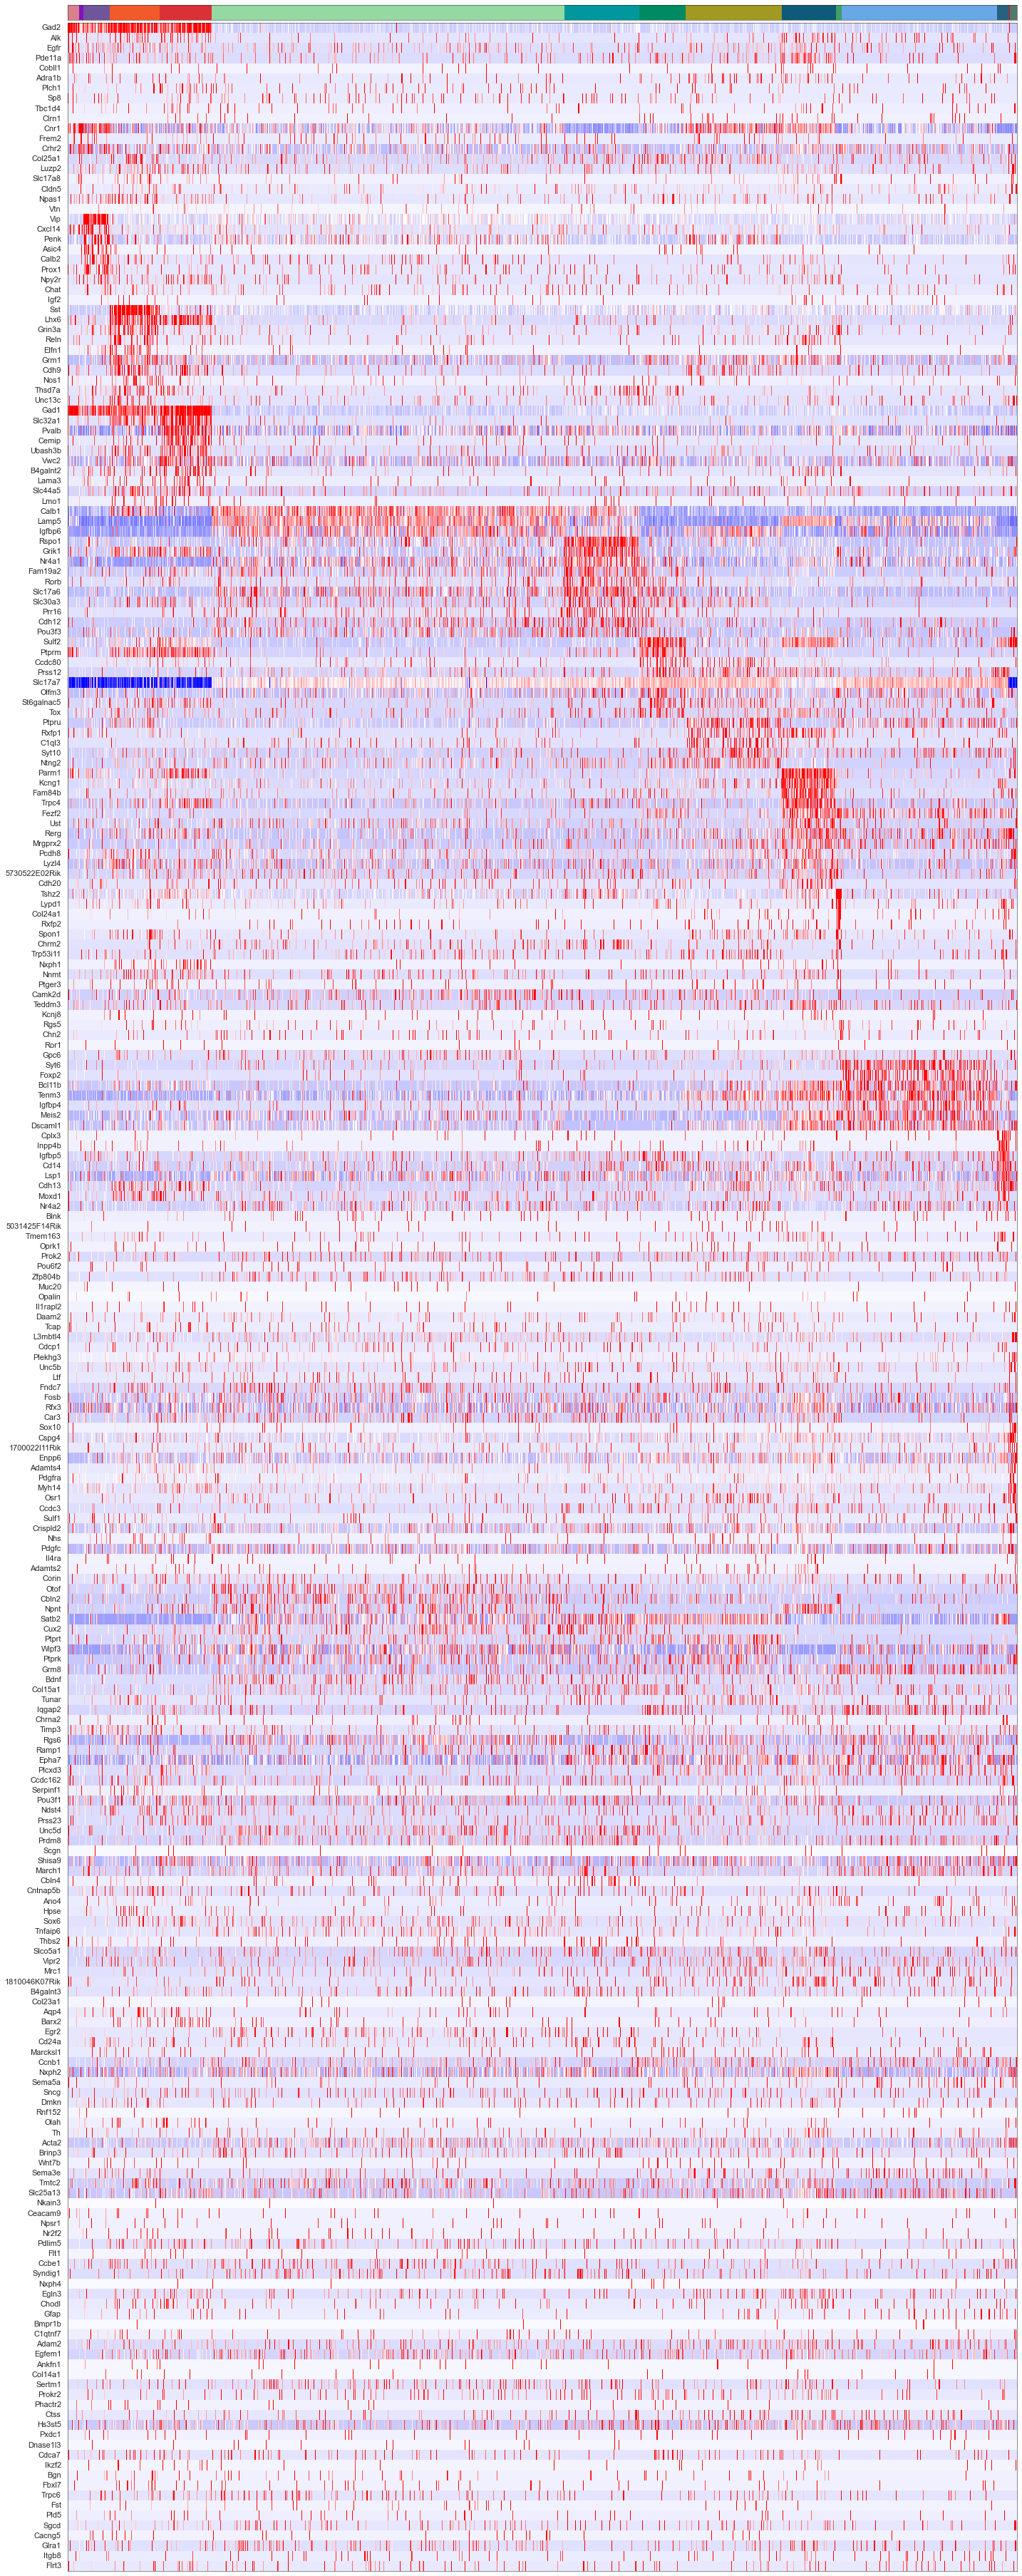

In [27]:
cols = [cell_class_colors[ct] for ct in uniq_celltypes_gmcs]
plot_heatmap(sorted_cbg[:, ::-1], sorted_genes[::-1], calls_gmcs, uniq_celltypes_gmcs, cols, [20, 50]).savefig("merfish_heatmap_gmcs.pdf")

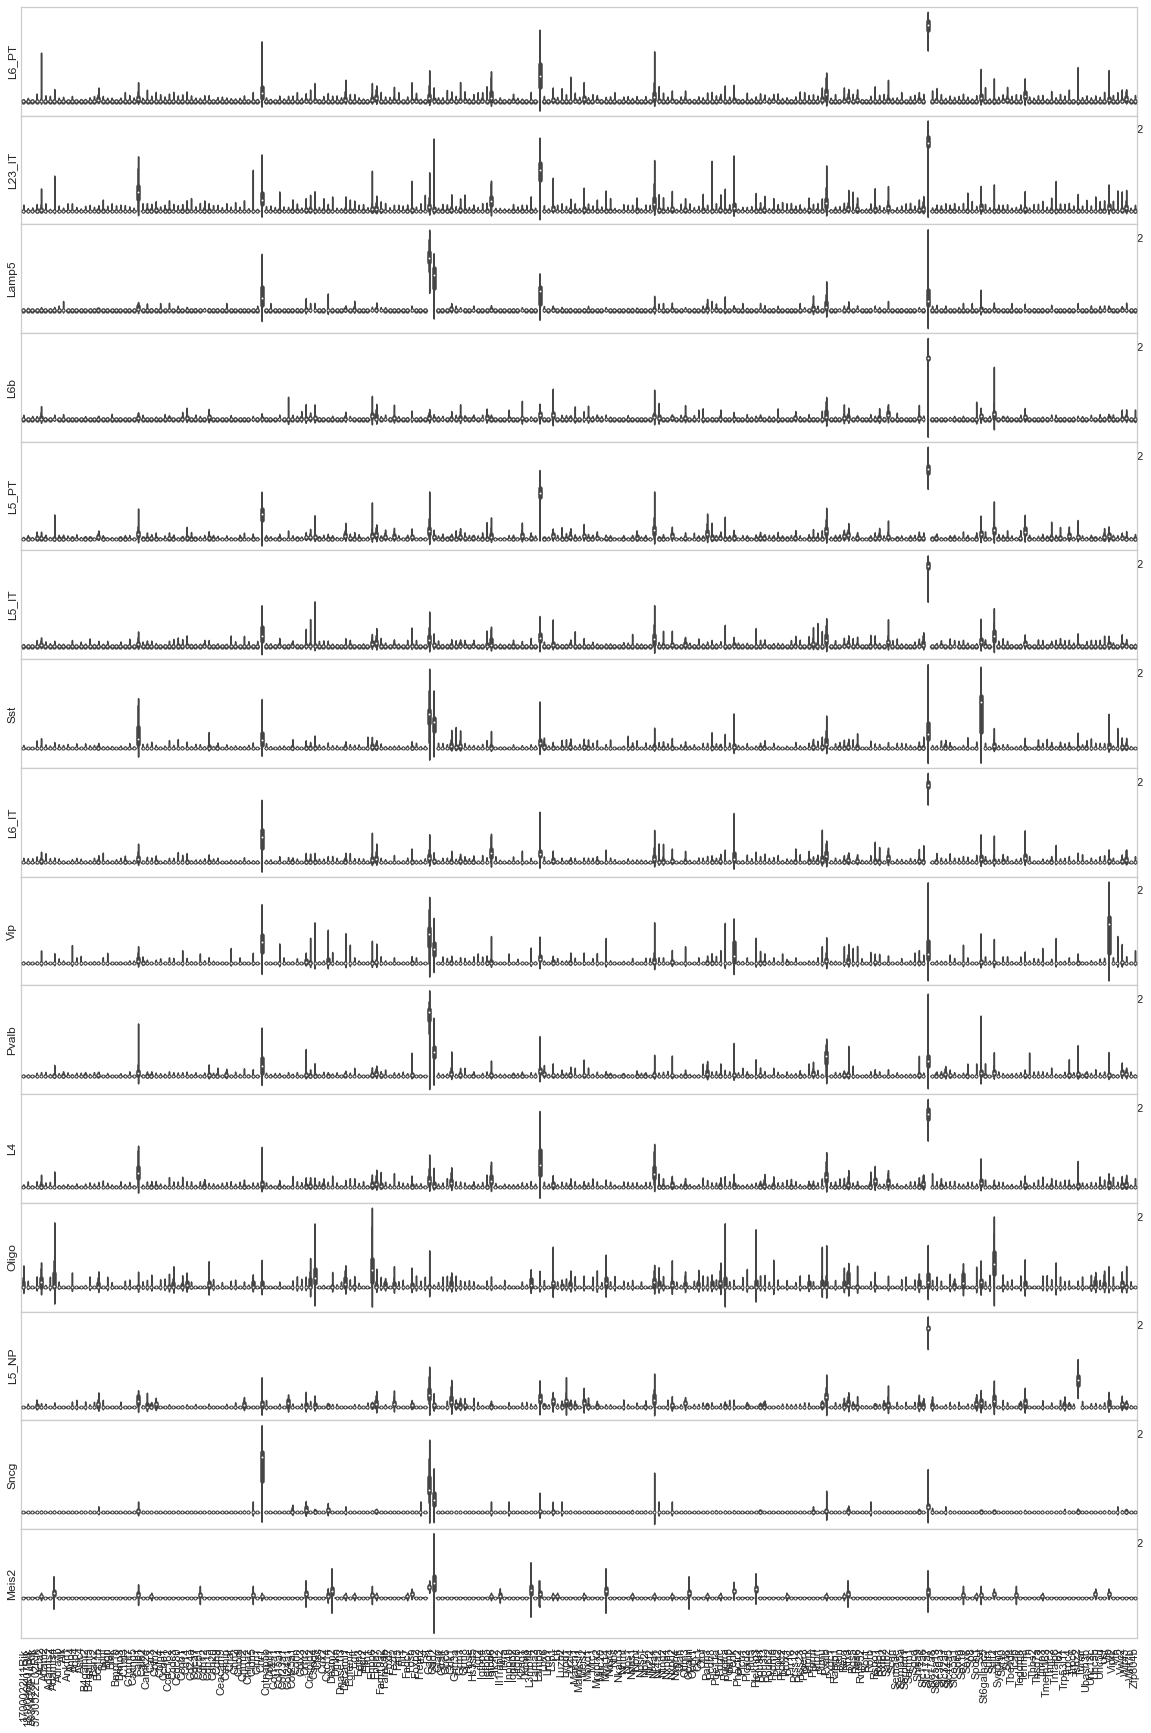

In [18]:
from sklearn import preprocessing
fig, axes = plt.subplots(len(uniq_celltypes_gmcs), 1, figsize=[20, len(uniq_celltypes_gmcs)*2])
plt.subplots_adjust(hspace=0)
for idx, cell_type in enumerate(uniq_celltypes_gmcs):
    cl_vecs = cell_by_gene_normalized_scaled[calls_gmcs.subclass == cell_type]
    if len(cl_vecs) == 1:
        cl_vecs = np.array([cl_vecs[0], cl_vecs[0]])
    sns.violinplot(ax=axes[idx], data=cl_vecs, width=1)
    axes[idx].set_ylabel(cell_type)
    axes[idx].set_yticks([])
axes[idx].set_xticklabels(ds.genes, rotation=90)
pass

In [ ]:
map_colors_gmcs = [cell_class_colors[ct.replace("_", " ").replace("L23", "L2/3")] for ct in uniq_celltypes_gmcs]

In [150]:
analysis.map_celltypes(centroids_gmcs)

Generating cell-type map for centroid #0...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #1...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #2...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #3...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #4...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #5...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #6...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map for centroid #7...
Processing chunk (0/3)...
Processing chunk (1/3)...
Processing chunk (2/3)...
Generating cell-type map

In [151]:
analysis.filter_celltypemaps(min_norm=0.6, min_r=0.6)

Text(0.5, 1.0, 'MERFISH - GMCS (SSAM)')

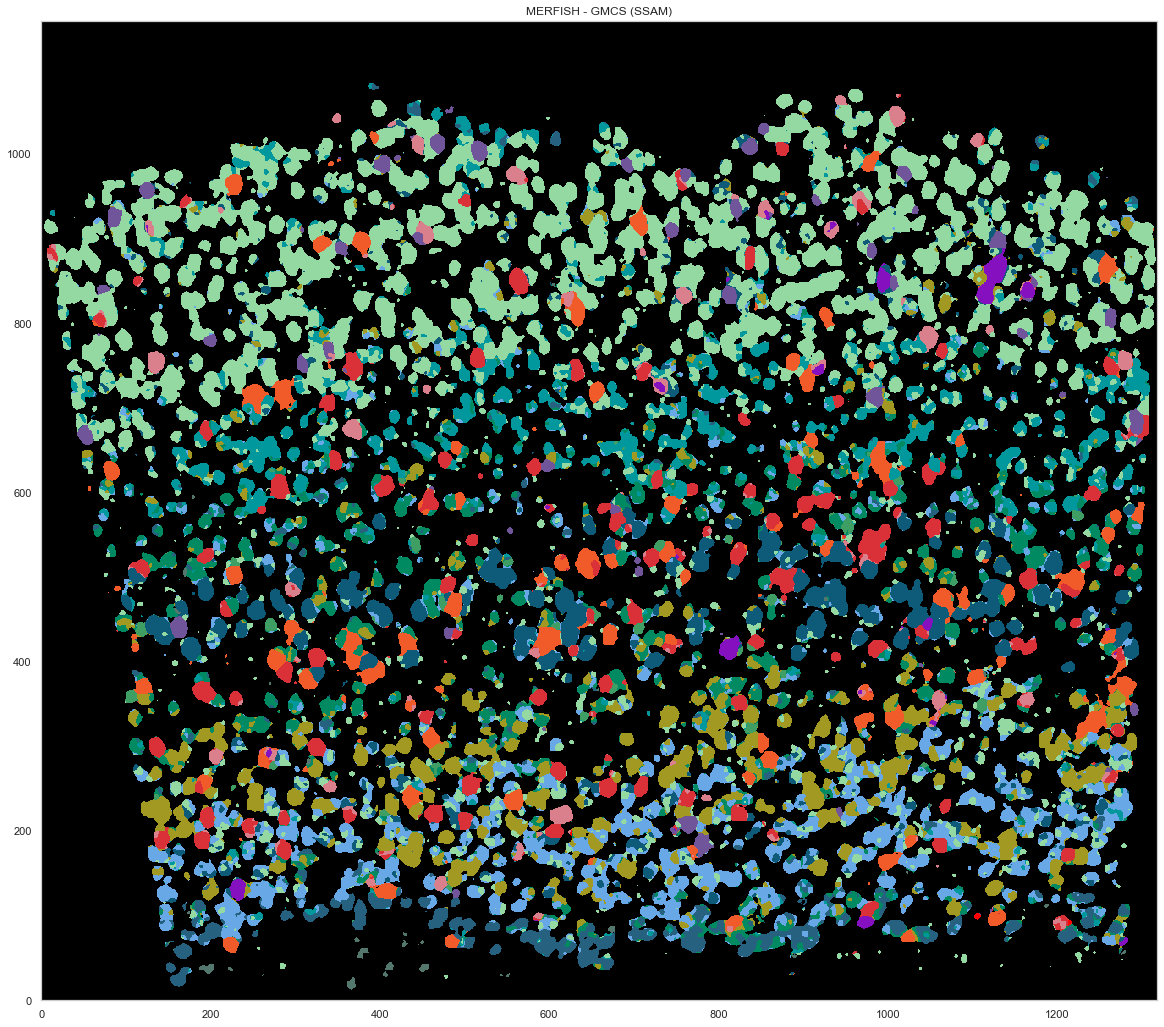

In [152]:
plt.figure(figsize=[20, 20])
ds.plot_celltypes_map(rotate=3, colors=map_colors_gmcs)
plt.title("MERFISH - GMCS (SSAM)")

In [44]:
closest_nwcs_clusters = []
closest_nwcs_clusters_r = []
closest_gmcs_clusters = []
closest_gmcs_clusters_r = []
for v in ds.normalized_vectors:
    corrs = [ssam.utils.corr(v, centroids_nwcs[i]) for i in range(len(centroids_nwcs))]
    idx = np.argmax(corrs)
    closest_nwcs_clusters.append(uniq_celltypes_nwcs[idx])
    closest_nwcs_clusters_r.append(corrs[idx])
    
    corrs = [ssam.utils.corr(v, centroids_gmcs[i]) for i in range(len(centroids_gmcs))]
    idx = np.argmax(corrs)
    closest_gmcs_clusters.append(uniq_celltypes_gmcs[idx])
    closest_gmcs_clusters_r.append(corrs[idx])
    
df = pd.DataFrame(ds.normalized_vectors, columns=ds.genes)
df.to_csv("merfish_ssam_localmax_expression.csv")

df = pd.DataFrame()
df['x'] = ds.local_maxs[0]
df['y'] = ds.local_maxs[1]
df['closest_consensus_nwcs_cluster'] = closest_nwcs_clusters
df['closest_consensus_nwcs_cluster_r'] = closest_nwcs_clusters_r
df['closest_consensus_gmcs_cluster'] = closest_gmcs_clusters
df['closest_consensus_gmcs_cluster_r'] = closest_gmcs_clusters_r
df['layer_annotations_nwcs'] = layer_annotations

df.to_csv("merfish_ssam_localmax_metadata_with_layer.csv")

Text(0.5, 1.0, 'MERFISH - NWCS')

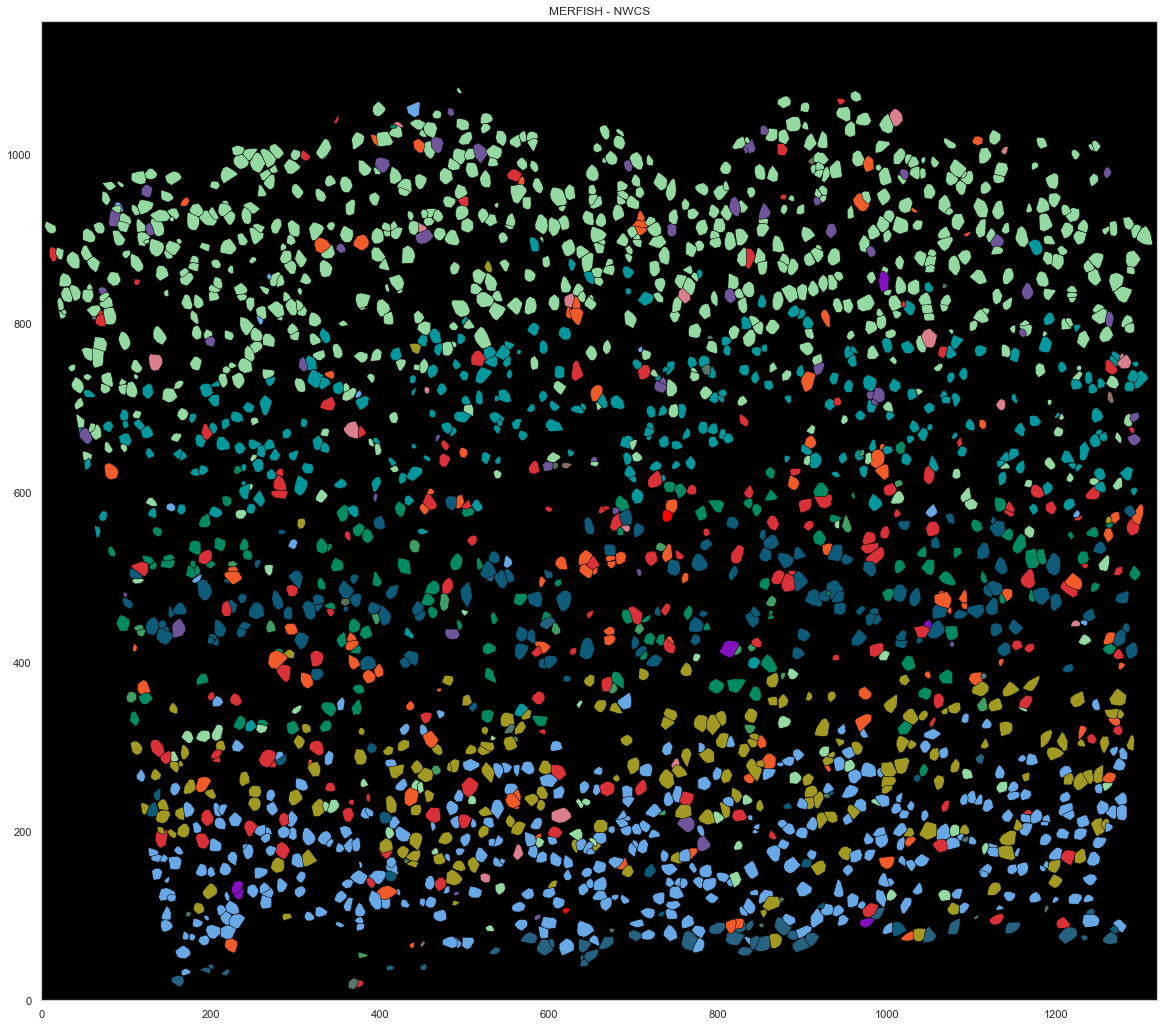

In [155]:
from scipy.spatial import ConvexHull

plt.figure(figsize=[20, 20])
plt.gca().set_facecolor('black')
good_ids = cell_by_gene.index.astype(int)
i = 0
for cid, sdf in locations.groupby("cell"):
    if cid in good_ids:
        points = sdf.iloc[:, :2].to_numpy()
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], cell_class_colors[calls_nwcs.subclass[i]], edgecolor="black", linewidth=0.5)
        i += 1
plt.xlim([0, ds.shape[0]])
plt.ylim([0, ds.shape[1]])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("MERFISH - NWCS")

Text(0.5, 1.0, 'MERFISH - GMCS')

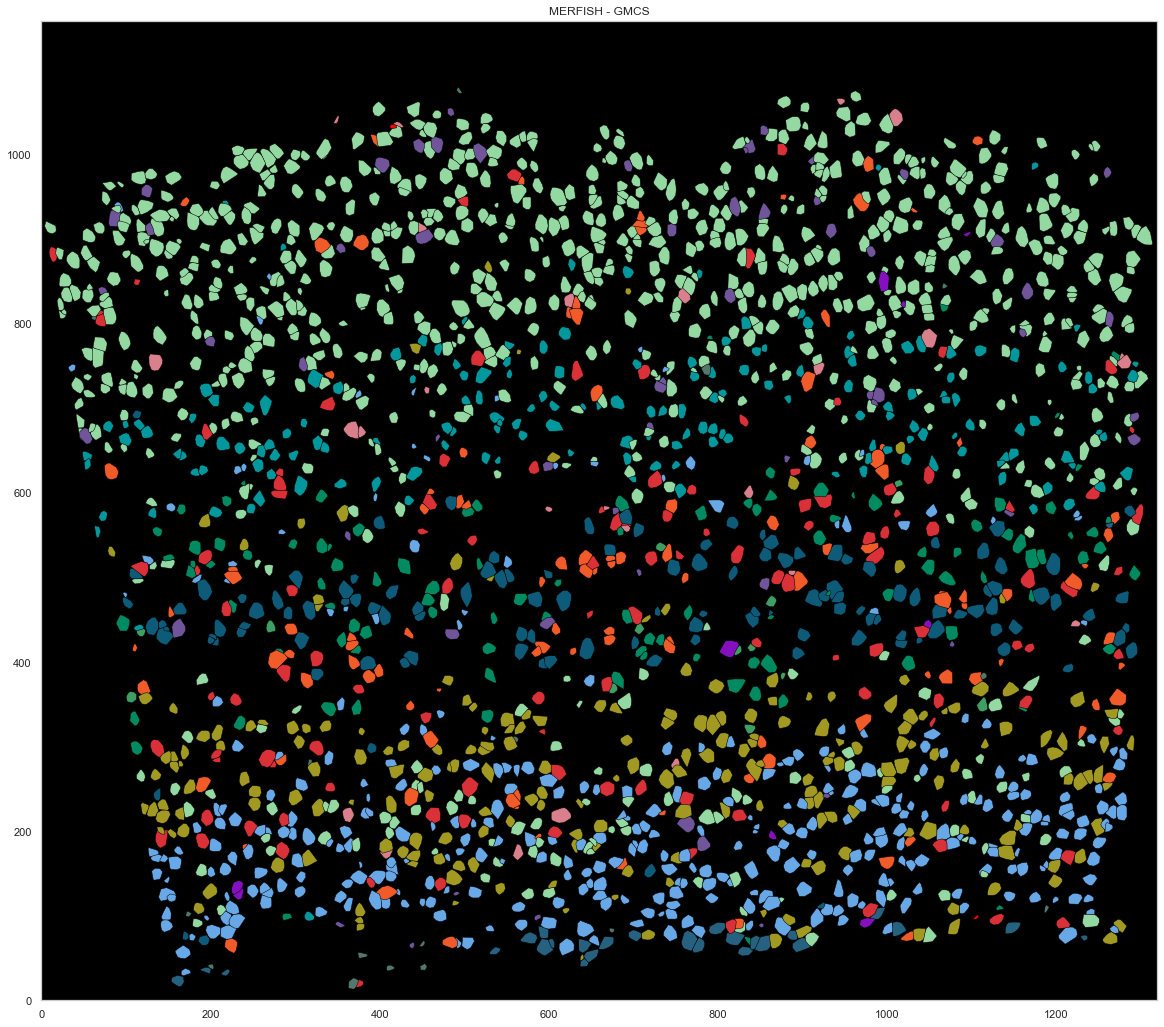

In [154]:
from scipy.spatial import ConvexHull

plt.figure(figsize=[20, 20])
plt.gca().set_facecolor('black')
good_ids = cell_by_gene.index.astype(int)
i = 0
for cid, sdf in locations.groupby("cell"):
    if cid in good_ids:
        points = sdf.iloc[:, :2].to_numpy()
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], cell_class_colors[calls_gmcs.subclass[i].replace("_", " ").replace("L23", "L2/3")], edgecolor="black", linewidth=0.5)
        i += 1
plt.xlim([0, ds.shape[0]])
plt.ylim([0, ds.shape[1]])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("MERFISH - GMCS")